# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instala previamente el paquete kohonen en R.



In [21]:
#SOM example using wines data set
library(kohonen)

set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

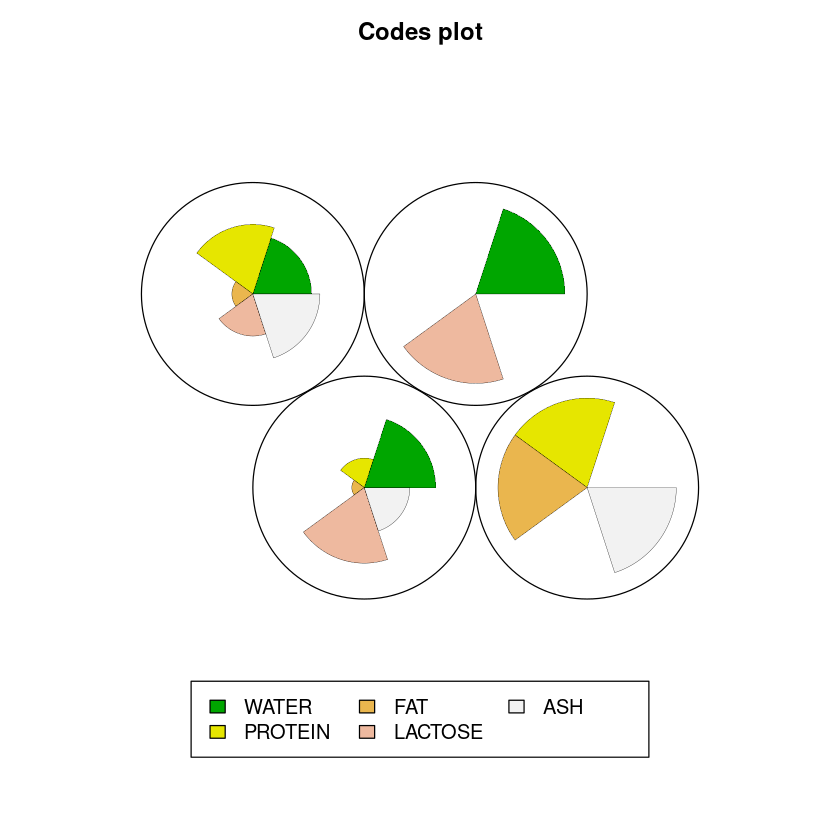

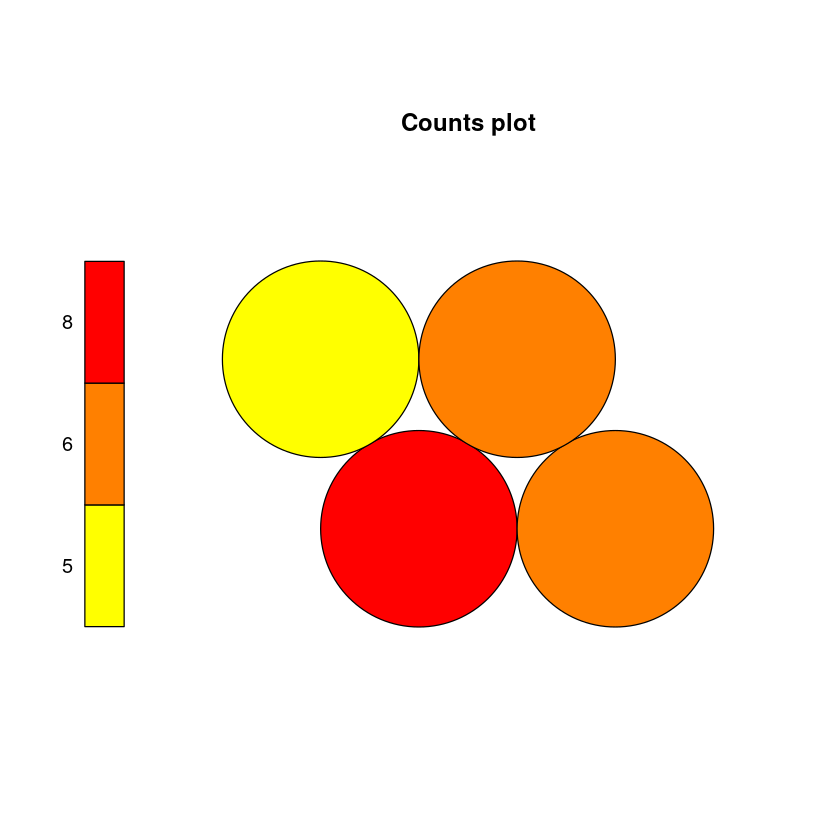

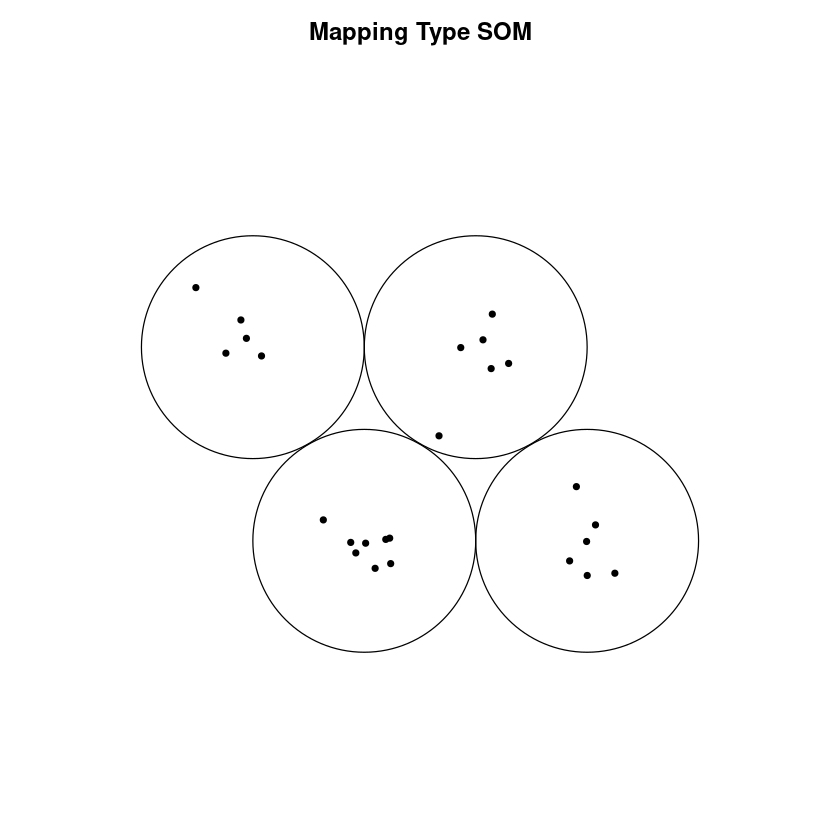

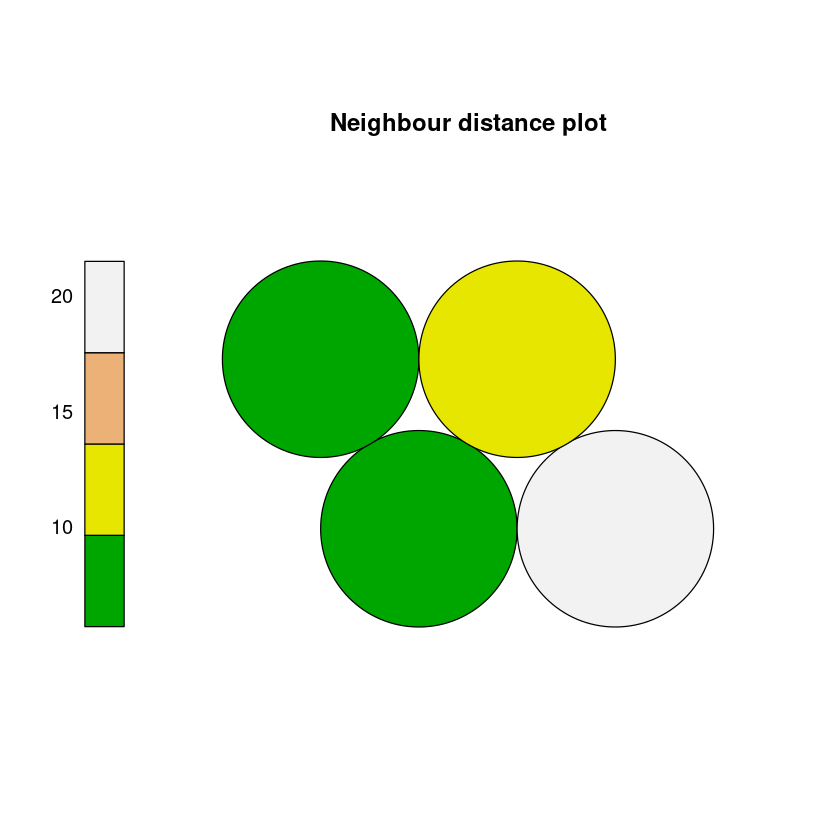

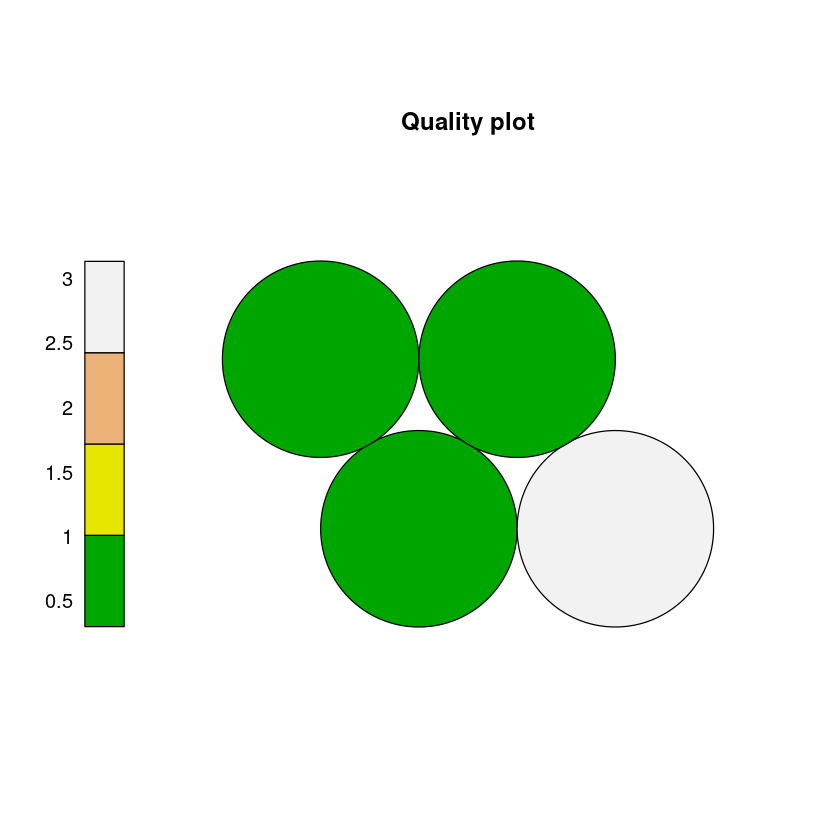

In [5]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)
plot(sommap, type = "quality", palette.name = terrain.colors)



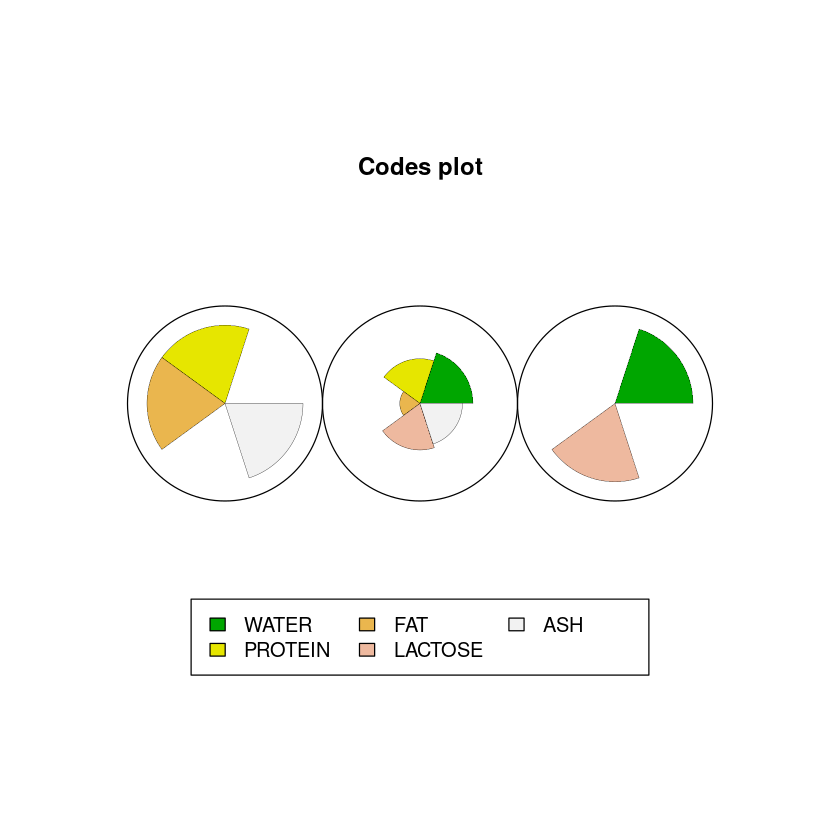

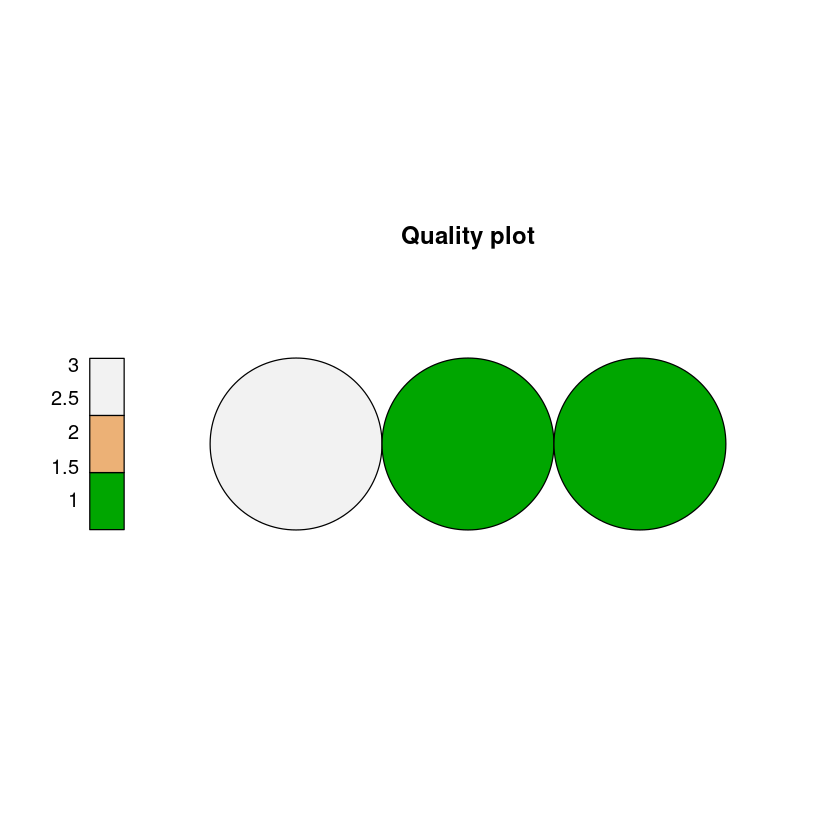

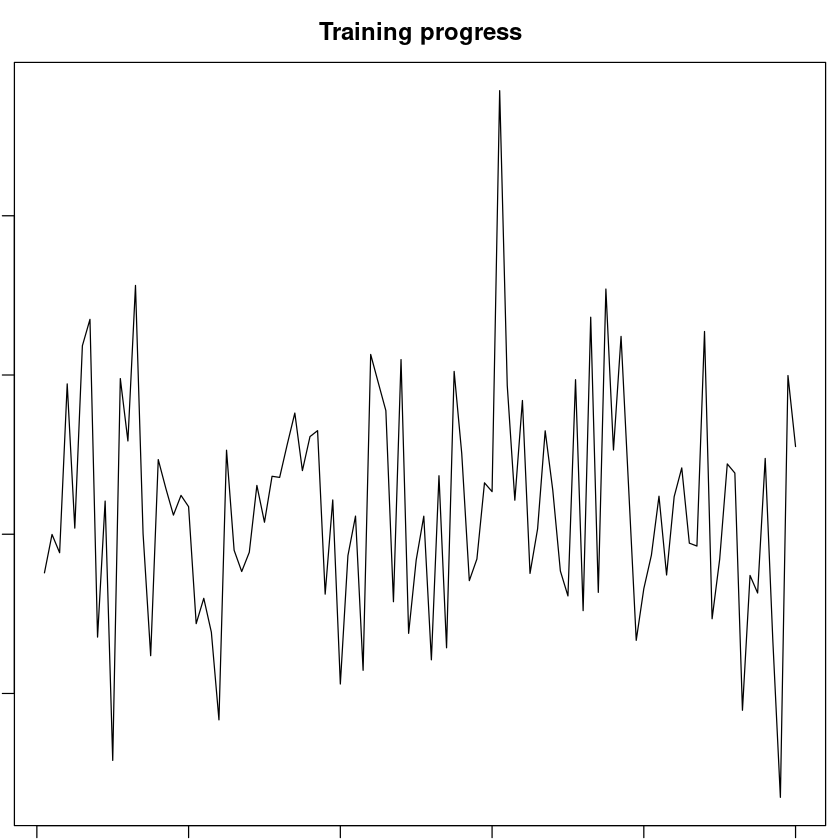

In [6]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(3, 1, "rectangular"))
plot(sommap)

plot(sommap, type = "quality", palette.name = terrain.colors)
plot(sommap, type = "changes")

Ejercicio 1: <br>

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.<br>

<b>R:</b>
Crea mapas auto-organizados para mapear patrones o espectros de altas dimensiones en 2D, usando distancia euclidiana.<br>
som(data, grid=somgrid(), rlen = 100, alpha = c(0.05, 0.01), radius = quantile(nhbrdist, 0.67) * c(1, -1), init, toroidal = FALSE, n.hood, keep.data = TRUE)<br>
INPUT:<br>
data: matriz en la cual cada fila representa un objeto<br>
grid: una grilla para las "representatives"<br>
rlen: numero de veces que el conjunto completo de datos será presentado a la red<br>
alpha: tasa de aprendizaje<br>
radius: radio de la vecindad<br>
init: "representativos" iniciales representados como matriz<br>
keep.data: almacena los datos en objeto retornado<br>
<br>
OUTPUT:<br>
data: matriz de datos(solo retornada si se selecciona keep.data==TRUE)<br>
grid: la grilla<br>
codes: matriz de vectores codigo<br>
changes: vector de desviacion absoluta mediana a partir de vectores codigo<br>
method: tipo de som<br>
<br>
- el grafico CODE muestra el porcentaje de cada caracteristica(grasa, proteina, agua, minerales, azucar) en cada cluster.
- el grafico COUNTS devuelve la cantidad de objetos en cada cluster<br>
- el grafico MAPPING TYPE muestra donde son mapeados los objetos<br>
- el grafico NEIGHBOUR DISTANCE muestra la suma de las distancias a todos los vecinos inmediatos.
<br>

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. <br>
<b>R:</b>
Se creo un grafico QUALITY, que muestra la distancia media de los objetos de la unidad. Este nos muestra una gran cercania entre los objetos de 3 unidades,  mientras que hay una gran distancia con el 4°.
<br>modificando somgrid podemos cambiar la cantidad de unidades que deseamos, al igual que su visualización. Lo cambiamos a 3 unidades y graficamos su QUALITY<br>
Aparte, se tomo en cuenta un grafico CHANGES, el cual muestra los cambios en las distancias medias durante el entrenamiento del modelo


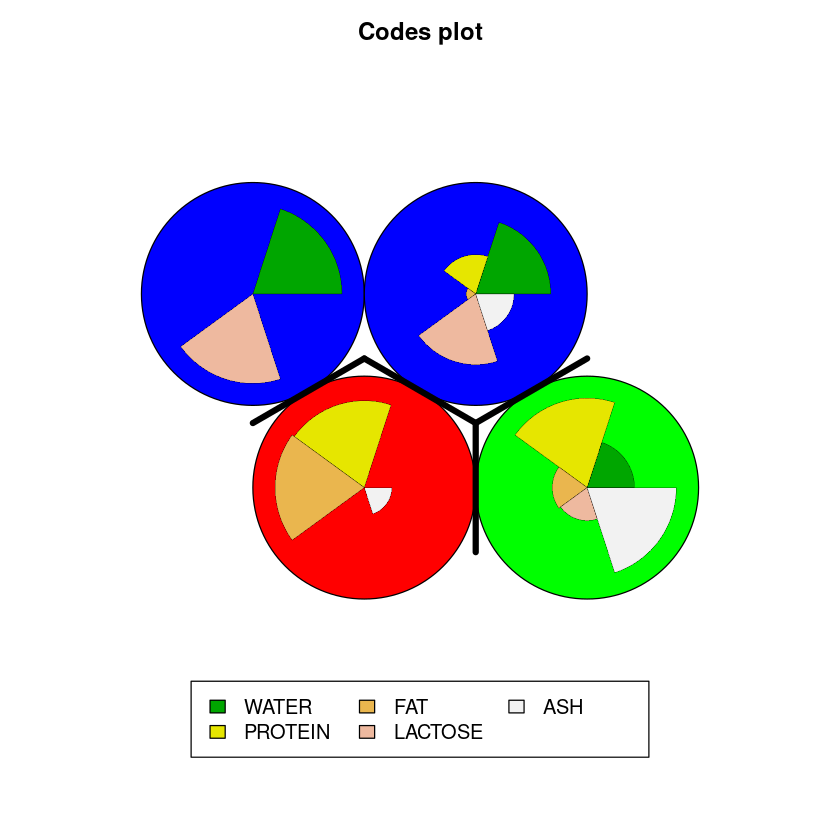

In [5]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: <br>
a) Explique como funciona esta nueva visualización.<br>
<b>R: </b>El grafico toma en cuenta la organizacion creada por SOM, y luego analizada con HC, cortado el dendograma a una altura 3, y luego pintando las unidades con el color correspondiente a su cluster. Los boundaries sirven para determinar que unidades deberian tomarse como un solo cluster<br><br><br>
b) Interprete y comente los resultados obtenidos. <br>
<b>R: </b>los circulos azules contienen el mayor porcentaje de agua y lactosa, lo que reafirma la conjetura de que deberían formar un solo cluster, mientras tanto el grupo del cirulo rojo poseen alto contenido graso-protenico, y por otro lado el grupo verde contiene el mayor porcentaje de minerales entre todos los grupos<br>


Ejercicio 3: <br>
a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección.<br>
<b>R: </b>Escogí un dataset de estrellas, ya que me interesaría ver como relaciona las distintas caracteristicas para formar sus grupos.<br> En este caso se toma como fuente una tabla de candidatos a pulsares, un tipo de estrellas, de considerable interés cientifico<br>
b) Realice las estimaciones y discuta sus resultados.<br>

In [19]:
library(kohonen)
data <-read.csv("HTRU_2.csv",sep=",",header=FALSE)
# summary(data)
# sky[1:13]
# sky[15:18]
dataF<-data[1:8]
dataC<-data$V9
# skyFeatures<-subset(sky,select=-class)
# skyClass<-subset(sky,select=class)
summary(dataF)

       V1                V2              V3                V4         
 Min.   :  5.812   Min.   :24.77   Min.   :-1.8760   Min.   :-1.7919  
 1st Qu.:100.930   1st Qu.:42.38   1st Qu.: 0.0271   1st Qu.:-0.1886  
 Median :115.078   Median :46.95   Median : 0.2232   Median : 0.1987  
 Mean   :111.080   Mean   :46.55   Mean   : 0.4779   Mean   : 1.7703  
 3rd Qu.:127.086   3rd Qu.:51.02   3rd Qu.: 0.4733   3rd Qu.: 0.9278  
 Max.   :192.617   Max.   :98.78   Max.   : 8.0695   Max.   :68.1016  
       V5                 V6               V7               V8          
 Min.   :  0.2132   Min.   :  7.37   Min.   :-3.139   Min.   :  -1.977  
 1st Qu.:  1.9231   1st Qu.: 14.44   1st Qu.: 5.782   1st Qu.:  34.961  
 Median :  2.8018   Median : 18.46   Median : 8.434   Median :  83.065  
 Mean   : 12.6144   Mean   : 26.33   Mean   : 8.304   Mean   : 104.858  
 3rd Qu.:  5.4643   3rd Qu.: 28.43   3rd Qu.:10.703   3rd Qu.: 139.309  
 Max.   :223.3921   Max.   :110.64   Max.   :34.540   Max.   :119

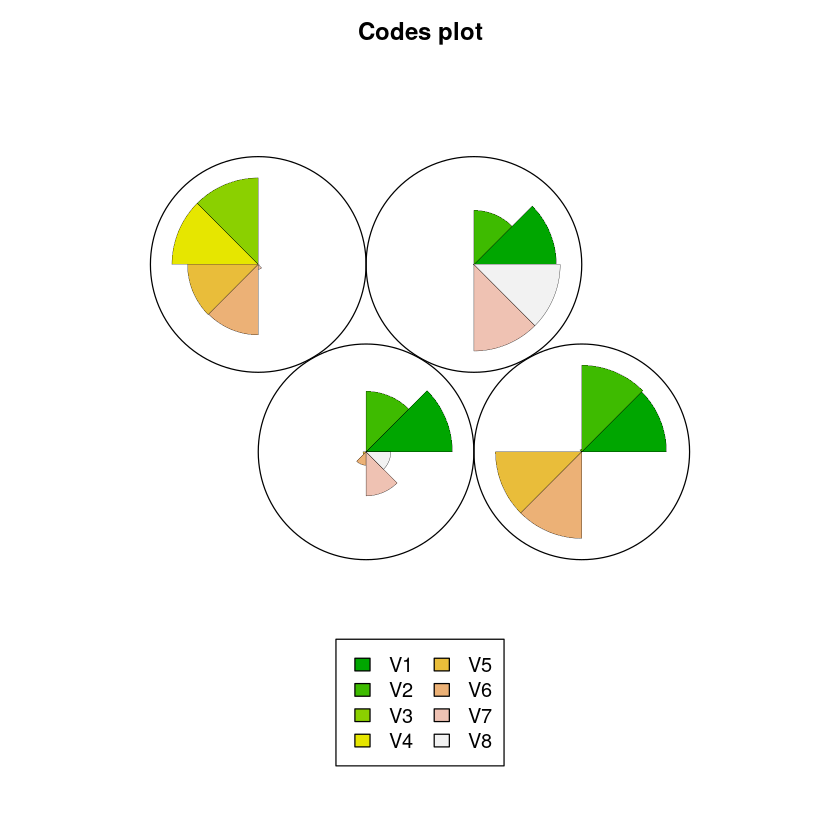

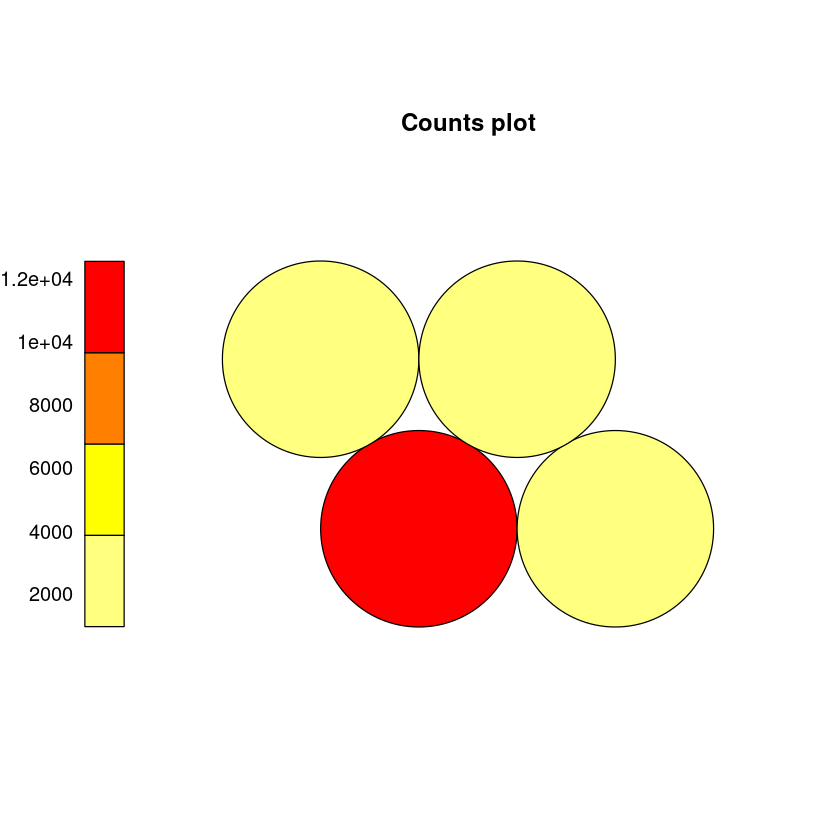

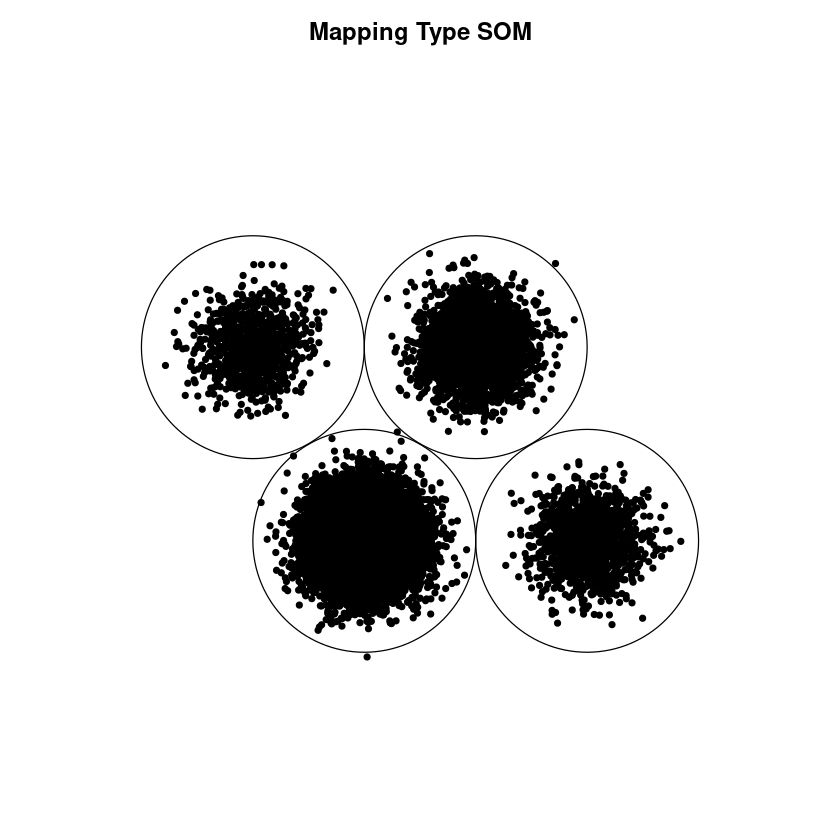

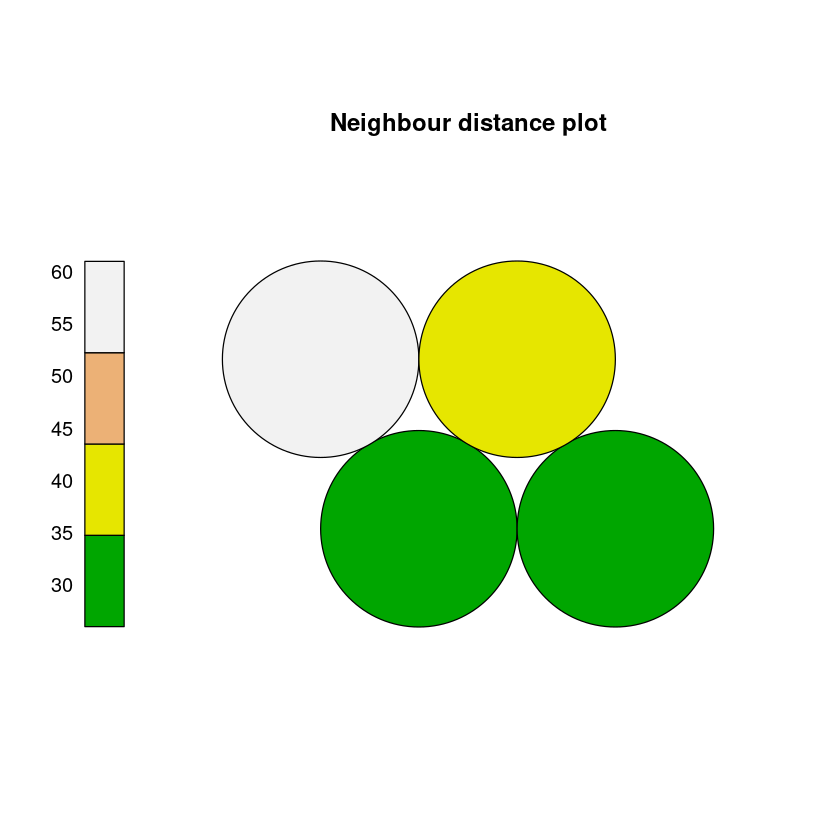

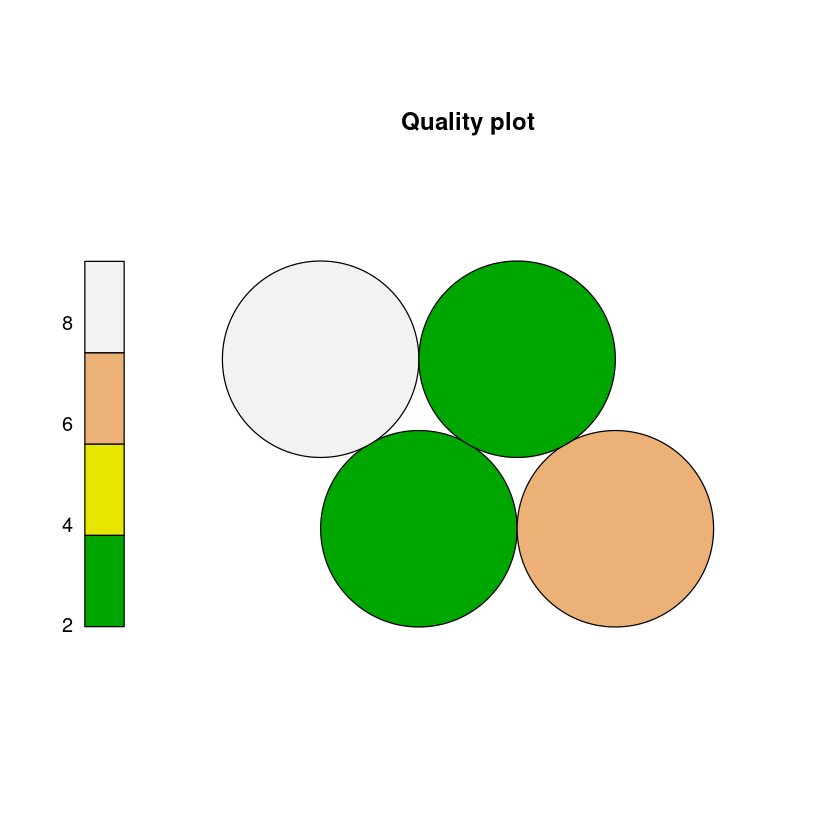

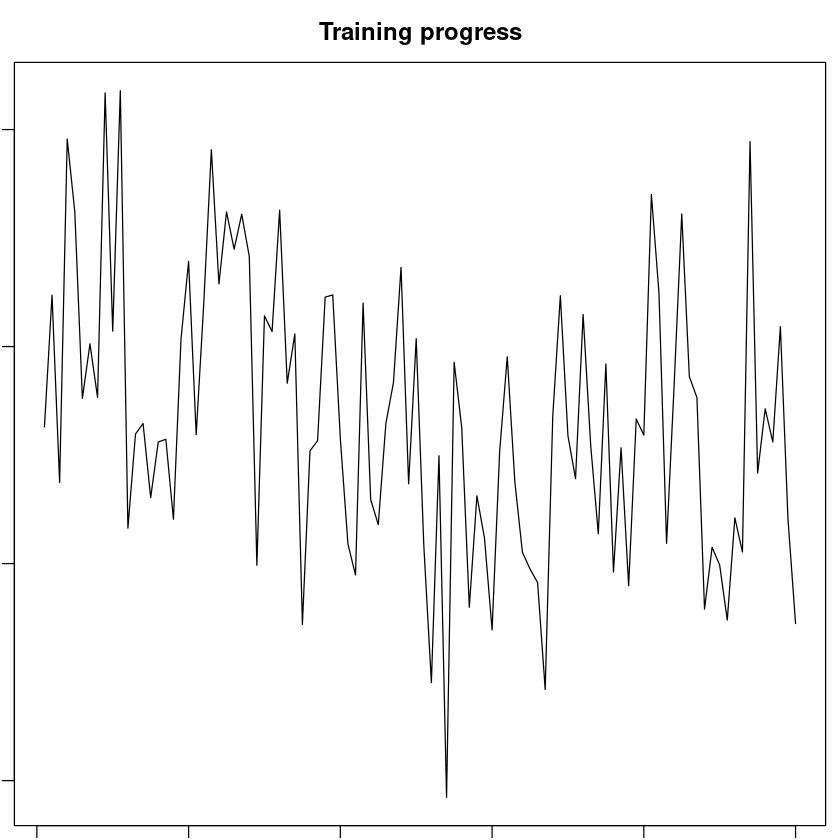

In [7]:
somMap <- som(scale(dataF), grid = somgrid(2,2, "hexagonal"))
plot(somMap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(somMap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(somMap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(somMap, type = "dist.neighbours", palette.name = terrain.colors)
plot(somMap, type = "quality", palette.name = terrain.colors)
plot(somMap, type = "changes")

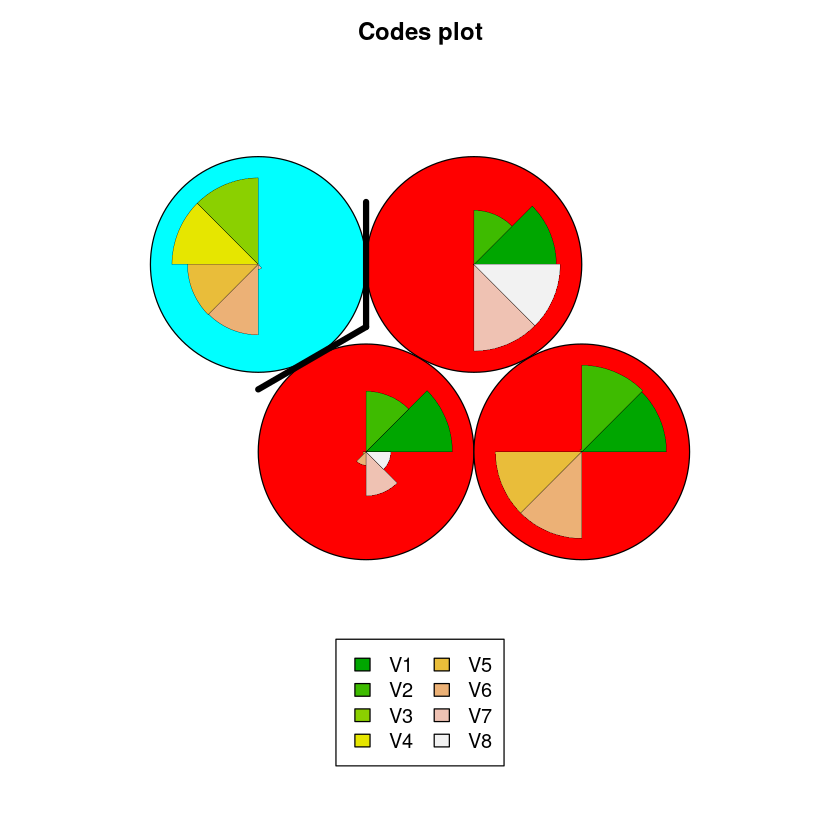

In [8]:
MAT <- matrix(somMap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-2
som.hc <- cutree(hclust(dist(MAT)), groups)


#plot
plot(somMap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(somMap, som.hc)


In [23]:
ClusterPurity <- function(clusters, classes) { #Función para purity
    tabla<-table(classes, clusters)
    print(tabla)
  sum(apply(tabla, 2, max)) / length(clusters)
}
somMap <- som(scale(dataF), grid = somgrid(2,1, "hexagonal"))
res<-somMap$unit.classif
print(ClusterPurity(res,dataC))

       clusters
classes     1     2
      0   829 15430
      1  1284   355
[1] 0.9338474
